# Introdução à Recuperação de Informações

# Lista de Exercícios 3 - Recuperação probabilística

## Ana Carolina Wagner G. de Barros

___

#### 1. Carregando as bibliotecas e preparando o ambiente

In [6]:
import numpy as np
import pandas as pd
import os

import nltk
from nltk.corpus import machado, mac_morpho
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import PortugueseStemmer

import string
from string import punctuation
from pprint import pprint

from collections import defaultdict
from collections import OrderedDict
from collections import Counter

from gensim import corpora, models, similarities

from math import log
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/acwgdb/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['log']
`%matplotlib` prevents importing * from pylab and numpy



Vamos partir da Prática 3 de modelagem de assuntos. Vamos usar a técnica de LSI (Latent Semantic Indexing) para definir um conjunto de documentos relevantes.

### Exercício 1

A partir de um corpus à sua escolha, estime um modelo de assuntos baseado no Modelo LSI. Uma vez calculado o modelo, defina um conjunto de **documentos relevantes** (${\cal R}$) para um assunto, como os $n$ documentos que contiverem em sua representação LSI, os maiores coeficientes para o assunto escolhido. Construa uma consulta $q$, com as dez palavras mais importantes do assunto escolhido.

O Primeiro passo é organizar o corpus a ser utilizado e neste caso foram escolhidos os documentos de Machado de Assis.

In [2]:
textos = [machado.raw(id) for id in machado.fileids()]
swu = stopwords.words('portuguese') + list (string.punctuation)
stemmer = PortugueseStemmer()

textos_limpos = []
for texto in textos:
    tlimpo = [stemmer.stem(token.lower()) for token in WordPunctTokenizer().tokenize(texto) if token not in swu]
    textos_limpos.append(tlimpo)

In [3]:
dicionario = corpora.Dictionary(textos_limpos)
corpus = [dicionario.doc2bow(text) for text in textos_limpos]

A partir do corpus gerado, vamos construir o modelo LSI.

In [8]:
# Modelo TFIDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Modelo LSI
lsi = models.LsiModel(corpus_tfidf, id2word=dicionario, num_topics=10)
corpus_lsi = lsi[corpus_tfidf]

In [25]:
data = {i: OrderedDict(lsi.show_topic(i,10)) for i in range(10)}
df = pd.DataFrame(data)
print(df.shape)
df = df.fillna(0).T

(50, 10)


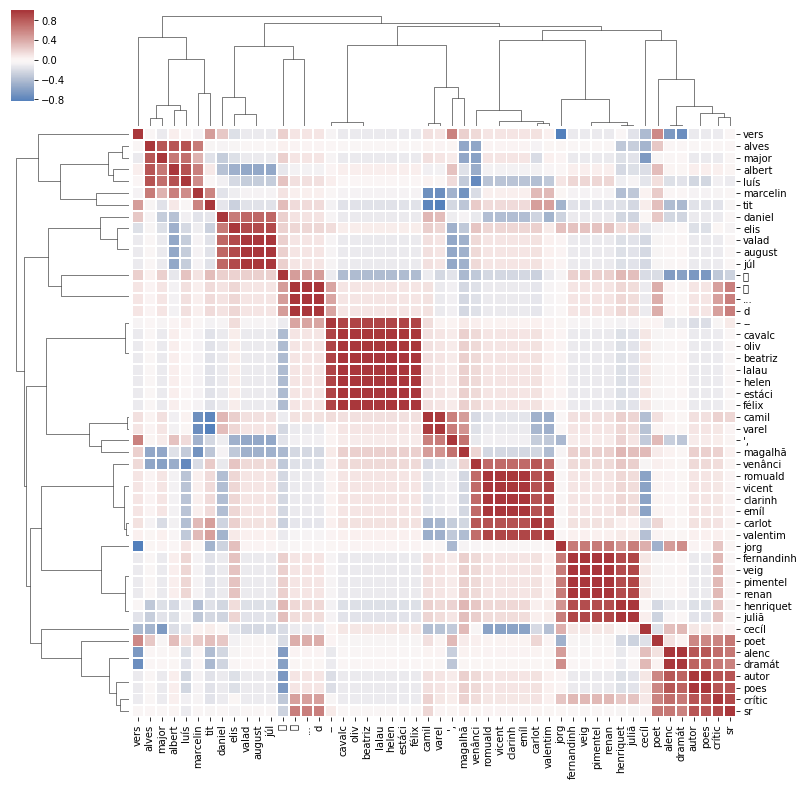

In [26]:
sns.clustermap(df.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

 Depois de estimar o modelo, vamos analisar os assutos, listando apenas as 10 palavras mais importantes.

In [9]:
lsi.show_topics(10,10)

[(0,
  '0.345*"--" + 0.272*"\x97" + 0.103*"sr" + 0.085*"poet" + 0.079*"luís" + 0.070*"..." + 0.061*"d" + 0.059*"crític" + 0.058*"camil" + 0.057*"\x93"'),
 (1,
  '-0.866*"--" + 0.244*"\x97" + -0.078*"félix" + -0.071*"helen" + -0.052*"cavalc" + -0.050*"beatriz" + -0.050*"oliv" + -0.045*"elis" + -0.043*"lalau" + -0.043*"estáci"'),
 (2,
  '0.344*"\x97" + -0.163*"crític" + -0.155*"poet" + -0.150*"sr" + 0.133*"luís" + -0.129*"alenc" + 0.124*"--" + -0.123*"dramát" + -0.112*"poes" + -0.105*"autor"'),
 (3,
  '-0.373*"henriquet" + 0.321*"luís" + 0.147*"marcelin" + 0.146*"daniel" + 0.142*"alves" + 0.132*"carlot" + 0.130*"cecíl" + 0.125*"albert" + -0.122*"juliã" + 0.119*"poet"'),
 (4,
  '-0.741*"henriquet" + -0.290*"juliã" + -0.144*"renan" + -0.117*"luís" + -0.088*"jorg" + -0.085*"fernandinh" + -0.080*"elis" + -0.078*"pimentel" + -0.075*"crític" + -0.074*"veig"'),
 (5,
  '0.527*"cecíl" + -0.435*"luís" + -0.203*"alves" + 0.141*"carlot" + 0.139*"venânci" + 0.121*"magalhã" + 0.120*"daniel" + -0.115*"

Podemos também olhar para os documentos do nosso corpus como uma combinação linear dos assuntos.

In [27]:
data = {'doc%s'%i: dict(doc) for i,doc in enumerate(corpus_lsi[:10])}
dfdoc = pd.DataFrame(data)
dfdoc = dfdoc.fillna(0)
dfdoc.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9
0,0.340993,0.473197,0.396386,0.493268,0.436874,0.300569,0.411875,0.198023,0.223333,0.138380
1,0.143150,-0.613671,0.180867,0.219624,0.195016,0.128942,0.204540,0.096685,0.072249,0.052771
2,0.223339,0.180922,0.103770,0.167804,0.203634,0.079776,0.163810,0.069169,0.045958,0.081463
3,0.170930,0.050032,-0.105296,-0.127158,-0.105268,-0.084613,-0.130248,0.006418,0.103343,-0.096122
4,-0.024347,-0.019842,0.077372,0.082919,0.080591,0.039509,0.066907,0.027060,0.029431,-0.280258


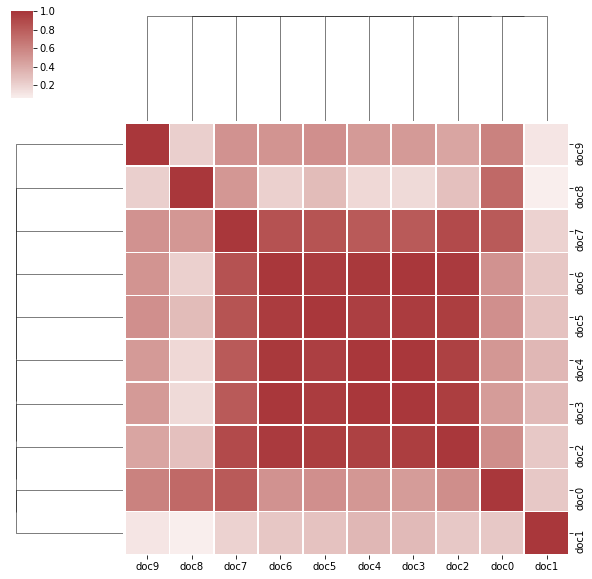

In [29]:
 sns.clustermap(dfdoc.corr(), center=0, cmap="vlag", metric='hamming',
               linewidths=.75, figsize=(10, 10));

In [37]:
dfdoc.T.describe()

,0,1,2,3,4,5,6,7,8,9
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.341290,0.068017,0.131965,-0.031798,0.007934,-0.009936,-0.024647,0.017051,0.022884,0.000860
std,0.122439,0.246219,0.062885,0.107513,0.108471,0.054814,0.115173,0.059136,0.035156,0.171604
min,0.138380,-0.613671,0.045958,-0.130248,-0.280258,-0.109699,-0.315790,-0.064002,-0.030208,-0.414192
25%,0.242642,0.078358,0.080198,-0.105289,-0.008116,-0.039328,-0.051588,-0.024214,0.002413,-0.038455
50%,0.368689,0.136046,0.133790,-0.090367,0.034470,-0.017440,0.008502,0.018809,0.020123,0.037180
75%,0.430625,0.191479,0.177643,0.039128,0.074755,0.026214,0.052124,0.041698,0.044429,0.117117
max,0.493268,0.219624,0.223339,0.170930,0.082919,0.069330,0.062018,0.138993,0.081718,0.164158


Dentre os 10 tópicos gerados, foi escolhido o assunto 5 para então definir os documentos relevantes. O critério utilizado foi escolher o tópico com interpretação mais intuitiva.

In [34]:
topico = 5
lsi.show_topic(topico,10)

[('cecíl', 0.52657770742869248),
 ('luís', -0.43517561496156287),
 ('alves', -0.20336989165594327),
 ('carlot', 0.14090497194146517),
 ('venânci', 0.13898505391554025),
 ('magalhã', 0.12112779267689024),
 ('daniel', 0.11988729542756886),
 ('major', -0.11451589948367683),
 ('albert', -0.11412563729624964),
 ('marcelin', -0.10373304046894773)]

Dessa forma, vamos construir o nosso conjunto relevante como sendo os 25 documentos mais influenciados pelo tópico escolhido. 

In [35]:
lista = []
for i,texto in enumerate(corpus_lsi):
    lista.append((texto[topico][1],i))

R_relevantes = []
n_relevantes = 25
for i in sorted(lista,reverse = True)[:n_relevantes]:
    R_relevantes.append(i[1])

In [36]:
R_relevantes = set(R_relevantes)
print(R_relevantes)

{11, 18, 19, 21, 22, 23, 26, 33, 162, 39, 171, 174, 50, 179, 54, 60, 216, 89, 222, 95, 105, 236, 110, 241, 242}



Construiremos também a nossa consulta utilizando os 10 termos mais pertinentes ao nosso tópico.

In [41]:
t_relevantes = 10
q_consulta = []
for t in lsi.show_topic(topico,10):
    q_consulta.append(t[0])

In [42]:
print(q_consulta)

['cecíl', 'luís', 'alves', 'carlot', 'venânci', 'magalhã', 'daniel', 'major', 'albert', 'marcelin']


### Exercício 2

Reutilizando os índices invertidos construídos em exercícios anteriores(Booleano, e TFIDF), calcule a precisão e revocação  com a consulta $q$ e o conjunto relevante ${\cal R}$ definidos no exercício anterior.

Inicialmente vamos gerar o índice invertido do nosso corpus:

In [43]:
indice = defaultdict(lambda:set([]))
for tid,t in enumerate(textos_limpos):
    for term in t:
        indice[term].add(tid)

A seguinte função faz uma busca booleana, de modo a retornar todos os documentos que possuem pelos menos um dos termos pesquisados.

In [45]:
def busca_booleana(search, indice):

    resultado = indice[search[0]]
    for token in search[1:]:
            resultado = resultado | indice[token]
    
    return resultado

In [46]:
resp_boo = busca_booleana(q_consulta,indice)
resp_boo = set(resp_boo)
print(resp_boo)

{0, 1, 2, 4, 5, 11, 12, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 36, 38, 39, 40, 43, 45, 49, 50, 51, 54, 55, 57, 59, 60, 61, 63, 64, 66, 67, 71, 76, 80, 81, 82, 83, 84, 92, 93, 95, 96, 105, 107, 110, 113, 120, 121, 122, 128, 139, 140, 151, 154, 158, 161, 162, 163, 165, 168, 171, 174, 175, 176, 179, 182, 183, 185, 187, 188, 190, 191, 192, 193, 196, 205, 210, 217, 218, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 235, 236, 237, 238, 240, 241, 242, 244, 245}


Quanto ao tf_idf, faremos a busca da seguinte forma:

In [47]:
T = nltk.TextCollection(textos_limpos)

tfidf_matrix = np.zeros((len(textos_limpos),len(q_consulta)))

for j, termo in enumerate(q_consulta):
    for i, texto in enumerate(textos_limpos):
        tfidf_matrix[i,j] = T.tf_idf(termo,texto)
        
Mtfidf_Norm = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tfidf_matrix])

In [48]:
def ordem(q,MN):
    return [np.dot(q,r) for r in MN]

Para definir os documentos encontrados utilizaremos o método de truncagem com valor estabelecido em (>=) 0,3.

In [53]:
vetor_tfidf = np.array([T.tf_idf(w,q_consulta) for w in q_consulta])
vetor_tfidf /= norm(vetor_tfidf)
resp_tfidf = ordem(vetor_tfidf,Mtfidf_Norm)

vtfidf = filter(lambda x : x[0]!=0.0, zip(resp_tfidf,range(len(textos_limpos))))

temp_tfidf = sorted(vtfidf, reverse=True)

trunc = 0.3
resp_tfidf = []
for i in temp_tfidf:
    if i[0]>= trunc:
        resp_tfidf.append(i[1])

In [54]:
resp_tfidf = set(resp_tfidf)
print(resp_tfidf)

{0, 2, 139, 140, 13, 15, 21, 22, 23, 151, 26, 158, 161, 33, 34, 165, 38, 39, 168, 182, 183, 185, 57, 187, 191, 193, 66, 67, 196, 82, 217, 218, 219, 93, 95, 224, 225, 223, 235, 236, 237, 241, 120, 122}


Por fim, vamos calcular a Revocação e a Precisão.

In [56]:
def RevPre(parcial,geral):
    
    rev = len(parcial & geral)/len(geral)
    pre = len(parcial & geral)/len(parcial)
    
    print('Revocação = ' + str(rev))
    print('Precisão = ' + str(pre))

In [58]:
print('Resultados para a busca booleana:')
RevPre(resp_boo,R_relevantes)
print('\n')
print('Resultados para a busca por tf_idf:')
RevPre(resp_tfidf,R_relevantes)

Resultados para a busca booleana:
Revocação = 0.88
Precisão = 0.2


Resultados para a busca por tf_idf:
Revocação = 0.36
Precisão = 0.20454545454545456


###  Exercício 3

Usando as definições de probabilidade de relevância apresentadas no capítulo 11 do Livro, construa uma função de recuperação probabilística usando o log da razão de Odds como **RSV** (retrieval status value). Calcule revocação e precisão para consulta $q$ e conjunto relevante ${\cal R}$. Compare a probabilidade $p_t=P(x_t=1|R=1,q)$, com a o rankeamento de importância das palavras que compõem o assunto escolhido.

Nos slides da aula 11, temos que o log da razão de odds para os termos na consulta ct é dado por:

$$c_t=\log\frac{p_t(1-u_t)}{u_t(1-p_t)}=\log\frac{p_t}{(1-p_t)}-\log\frac{u_t}{1-u_t}$$

A razão de odds (ou razão de chances) é a razão de dois odds, em que 

i) $x_1 = \frac{p_t}{(1-p_t)}$ são os odds do termo aparecer se o documento for relevante; e

ii) $x_2 = \frac{u_t}{(1-u_t)}$ são os odds do termo aparecer se o documento for irrelevante.

RSV para o documento d: $RSV_d = \sum_{x_t=q_t=1}{c_t}$.

https://en.wikipedia.org/wiki/Odds_ratio

Inicialmente vamos construir a função de busca probabilística:

In [64]:
def busca_probabilistica(query, indice, relevantes, n_docs = 246):
    
    # query = consulta a ser realizada
    # indice = indice invertido
    # relevantes = conjunto de documentos atualmente considerados relevantes
    # N_docs = número de documentos presente no corpus
    
    query_tok = query
    
    c_t = []
    soma = len(relevantes)
    n = n_docs
    
    for termo in query_tok:
        soma_aux = len(indice[termo] & relevantes)
        df = len(indice[termo])
        
        up = soma_aux/(soma - soma_aux + 0.5)
        down =(df - soma_aux)/(n - df - soma + soma_aux - 0.5)
        
        c_t.append(np.log(up/down))
    
    RSV_d = []
    for doc in range(n):
        rsv = 0
        for pos,termo in enumerate(query_tok):
            if doc in indice[termo]:
                rsv += c_t[pos]
        RSV_d.append((rsv,doc))
        
    resultado = sorted(RSV_d,reverse=True)
    
    return resultado

In [65]:
temp_prob = busca_probabilistica(q_consulta,indice,R_relevantes)
print(temp_prob[:10])

[(7.1181165456340354, 185), (6.510361149090981, 95), (4.6567053210485279, 26), (4.5576043274829017, 11), (3.9404848643242802, 236), (3.8311207266553646, 33), (3.3362851697808313, 140), (3.2869958189786708, 218), (2.7670671404257901, 225), (2.6827961244352214, 244)]


/Users/acwgdb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning:

divide by zero encountered in log



Agora vamos calcular a Revocação e a Precisão, para isso, usaremos novamente o método de truncagem e iremos considerar  como resposta os documentos com RSV acima de 1.

In [66]:
trunc = 1
resp_prob = []
for i in temp_prob:
    if i[0] >= trunc:
        resp_prob.append(i[1])
        
resp_prob = set(resp_prob)
print(resp_prob)

{0, 5, 11, 140, 139, 16, 18, 21, 22, 26, 154, 33, 162, 165, 39, 171, 43, 174, 50, 179, 54, 185, 60, 63, 67, 196, 71, 76, 80, 217, 218, 95, 223, 225, 105, 107, 236, 110, 241, 242, 244, 245, 121}


In [67]:
RevPre(resp_prob,R_relevantes)

Revocação = 0.8
Precisão = 0.46511627906976744


Por fim, iremos calcular a probabilidade p_termo para cada termo de nossa consulta (a mesma realizada no exercício 1):

In [69]:
p_termo = []
S = len(R_relevantes)
for termo in q_consulta:
    s = len(indice[termo] & R_relevantes)
    p_termo.append((termo,s/S))

In [71]:
print(p_termo)
print('\n')
print(lsi.show_topic(topico,10))

[('cecíl', 0.36), ('luís', 0.16), ('alves', 0.04), ('carlot', 0.2), ('venânci', 0.12), ('magalhã', 0.2), ('daniel', 0.2), ('major', 0.04), ('albert', 0.08), ('marcelin', 0.0)]


[('cecíl', 0.52657770742869248), ('luís', -0.43517561496156287), ('alves', -0.20336989165594327), ('carlot', 0.14090497194146517), ('venânci', 0.13898505391554025), ('magalhã', 0.12112779267689024), ('daniel', 0.11988729542756886), ('major', -0.11451589948367683), ('albert', -0.11412563729624964), ('marcelin', -0.10373304046894773)]


Como podemos observar, os vetores são distintos... entretanto, é possível verificar uma certa correlação considerando a ordem de significância. Ou seja, os termos que possuem uma menor relevância para o tópico escolhido, também apresentam uma probalidade menor. 

###  Exercício 4: Indexação Semântica Latente.

Repita o exercício 3 agora usando o modelo **Okapi BM25** para o rankeamento. Calcule precisão e revocação. 

Ainda da aula 11, temos que:

O Okapi BM25 é um modelo probabilístico que incorpora frequência dos termos (ou seja, não é binário) e normalização de comprimento. Para buscas de texto completo modernas, um modelo deve atentar à frequência de termos e ao comprimento do documento. BestMatch25 (também conhecido como BM25 ou Okapi) é sensível a estas grandezas. O BM25 é um dos modelos de recuperação mais robustos e amplamente utilizados.
  
$$RSV_d = \sum_{t\in q}{\log\left[\frac{N}{t}\right]\cdot \frac{(k_1+1)tf_{td}}{k_1((1-b)+b\times (L_d/L_{med}))+tf_{td}}}$$

onde,

* $tf_{td}$: Frequência do termo no documento $d$;
* $L_d (L_{med})$: Comprimento do documento $d$ (Comprimento médio dos documentos na coleção inteira);
* $k_1$: Parâmetro de ajuste controlando a influência da frequencia do termo;
* $b$: Parâmetro de ajuste controlando a in uência do comprimento do documento.

Vamos repetir o mesmo procedimento do exercício anterior. Assim, inicialmente vamos definir uma nova função de busca:

In [81]:
def busca_okapi_bm25(query, indice, corpus):
    
    # query = consulta a ser realizada
    # indice = indice invertido
    
    query_tok = query 
    
    N = len(corpus)
    
    L = []
    for texto in corpus:
        L.append(len(texto))
        
    L_med = sum(L)/N
    k1 = 1.2
    b = 0.75
    
    RSVd = []
    for doc in range(N):
        rsv = 0
        
        for termo in query_tok:
            if doc in indice[termo]:
                tf = 1 
            df = len(indice[termo])
        rsv += np.log(N/df)*((k1 + 1)*tf)/(k1*(1 - b + (b*(L[doc]/L_med))) + tf)
        
        RSVd.append((rsv,doc))
        
    resultado = sorted(RSVd,reverse=True)
    
    return resultado


In [82]:
temp_okapi = busca_okapi_bm25(q_consulta,indice, textos_limpos)
print(temp_okapi[:10])

[(6.2393542810351423, 199), (6.2027710326330876, 211), (6.2007879168888991, 204), (6.1522693329462017, 197), (6.1490184201635358, 170), (6.1354020203837338, 177), (6.1051446611116287, 169), (6.069480689933819, 201), (6.0618925523896925, 209), (6.0336052313313404, 212)]


In [83]:
trunc_okapi = 1
resp_okapi = []
for i in temp_okapi:
    if i[0] >= trunc_okapi:
        resp_okapi.append(i[1])
        
resp_okapi = set(resp_okapi)
print(resp_prob)

{0, 5, 11, 140, 139, 16, 18, 21, 22, 26, 154, 33, 162, 165, 39, 171, 43, 174, 50, 179, 54, 185, 60, 63, 67, 196, 71, 76, 80, 217, 218, 95, 223, 225, 105, 107, 236, 110, 241, 242, 244, 245, 121}


In [84]:
RevPre(resp_okapi,R_relevantes)

Revocação = 1.0
Precisão = 0.10245901639344263


In [86]:
# Resposta do Exercício 3
RevPre(resp_prob,R_relevantes)

Revocação = 0.8
Precisão = 0.46511627906976744


Como podemos observar, nota-se ganhos consideráveis no algoritmo Okapi BM25 em relação aos outros.